# Shanghai Rankings Time Series Analysis

## 1. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [3]:
# Import dataset

df_shanghai = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shanghai_top100.csv'))

In [4]:
# Check to see if it was imported correctly

df_shanghai

,Unnamed: 0,world_rank_Shanghai,university_name,national_rank,overall_score_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year,country
0,0,1,Harvard University,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America
1,1,2,University of Cambridge,1.0,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,United Kingdom
2,2,3,Stanford University,2.0,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,United States of America
3,3,4,"University of California, Berkeley",3.0,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,United States of America
4,4,5,Massachusetts Institute of Technology (MIT),4.0,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1096,96,McMaster University,4.0,24.4,12.6,18.8,23.2,15.1,44.5,22.5,2015,Canada
1097,1097,97,University of Bonn,4.0,24.3,15.4,19.8,17.4,21.1,39.8,25.9,2015,Germany
1098,1098,98,VU University Amsterdam,4.0,24.2,0.0,0.0,27.8,18.0,55.5,33.3,2015,Netherlands
1099,1099,99,Michigan State University,50.0,24.0,8.9,0.0,30.7,21.8,50.6,18.9,2015,United States of America


## 2. Data Wrangling, Cleaning, and Subsetting

In [5]:
# Removing the 'Unnamed: 0' column

df_shanghai = df_shanghai.drop(columns = ['Unnamed: 0'])

In [6]:
df_shanghai.dtypes

world_rank_Shanghai         int64
university_name            object
national_rank             float64
overall_score_Shanghai    float64
alumni_score              float64
award_score               float64
hici_score                float64
ns_score                  float64
publication_score         float64
pcp_score                 float64
year                        int64
country                    object
dtype: object

In [8]:
# Create a subset with only relevant numerical columns, grouped by 'year' and 'country' columns first

df_shanghai_sub1 = df_shanghai.groupby(['year', 'country'], as_index=False)[['world_rank_Shanghai', 
                                                                             'alumni_score',
                                                                             'award_score',
                                                                             'hici_score',
                                                                             'ns_score',
                                                                             'publication_score',
                                                                             'pcp_score']].mean()

In [9]:
df_shanghai_sub1.head()

,year,country,world_rank_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score
0,2005,Australia,69.0,16.550,13.650,29.55,23.850,49.30,23.850
1,2005,Austria,85.0,25.100,15.800,7.90,22.700,52.20,26.400
2,2005,Canada,54.5,23.575,14.575,30.55,27.725,59.35,32.425
3,2005,Denmark,57.0,30.700,24.700,23.60,22.800,45.70,27.700
4,2005,Finland,76.0,18.800,18.200,15.70,21.400,54.50,27.500


In [10]:
df_shanghai_sub1.shape

(174, 9)

In [11]:
# Create a further subset that just includes the year, country, and world ranking columns

df_shanghai_timerank = df_shanghai_sub1[['year', 'country', 'world_rank_Shanghai']]

In [12]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

df_shanghai_timerank.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shanghai_top100_timecountrygrouped.csv'))

In [14]:
# Create a subset that only includes universities from the USA

df_shanghai_USA = df_shanghai_timerank.loc[df_shanghai_timerank['country'] == 'United States of America']

df_shanghai_USA

,year,country,world_rank_Shanghai
16,2005,United States of America,39.603774
32,2006,United States of America,41.370370
47,2007,United States of America,41.074074
62,2008,United States of America,41.222222
77,2009,United States of America,42.309091
93,2010,United States of America,41.888889
109,2011,United States of America,40.962264
125,2012,United States of America,40.735849
141,2013,United States of America,39.000000
157,2014,United States of America,41.576923


In [15]:
# Drop the 'country' column since it is unnecessary now

df_shanghai_USA = df_shanghai_USA.drop(columns = ['country'])

In [16]:
# Set the "year" column as the index

from datetime import date

df_shanghai_USA['datetime'] = pd.to_datetime(df_shanghai_USA['year'], format='%Y') # Create a datetime column from "year.""
df_shanghai_USA = df_shanghai_USA.set_index('datetime') # Set the datetime as the index of the dataframe.
df_shanghai_USA.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
df_shanghai_USA.head()

,world_rank_Shanghai
datetime,
2005-01-01,39.603774
2006-01-01,41.370370
2007-01-01,41.074074
2008-01-01,41.222222
2009-01-01,42.309091


## 3. Create a line chart of the data

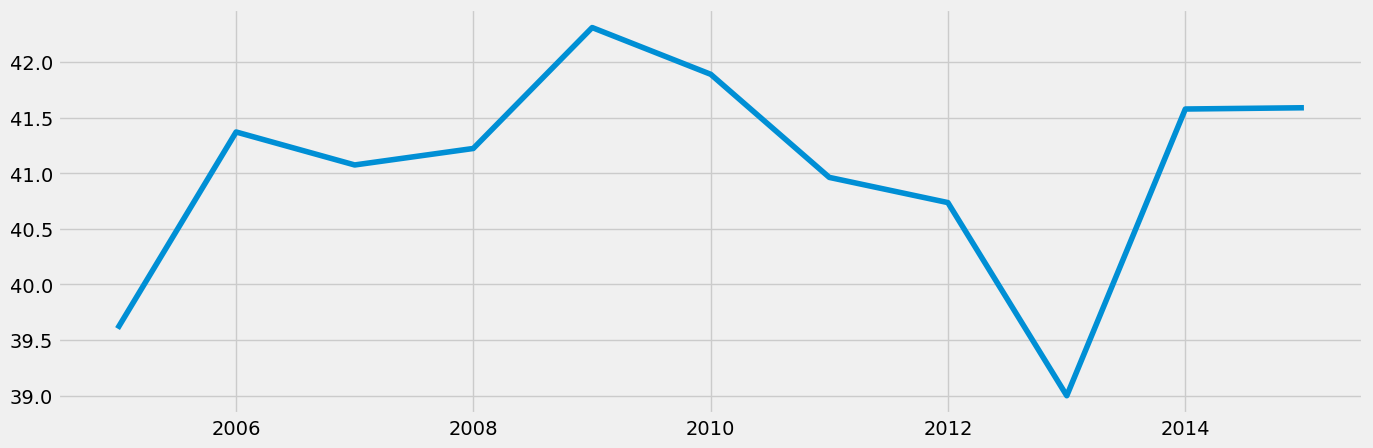

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_shanghai_USA)

Due to the small number of years available in the data, the line chart for the average world rankings of American Universities seems rather simplistic. There is an overall general increase in world rankings for American universities, but unlike the CWUR and Times datasets, the data fluctuates more which is likely due to the increase in available datapoints. The USA is still very consistent and has the largest amount of top universities out of all countries by a large margin. 

## 4. Decompose the data's components

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_shanghai_USA, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

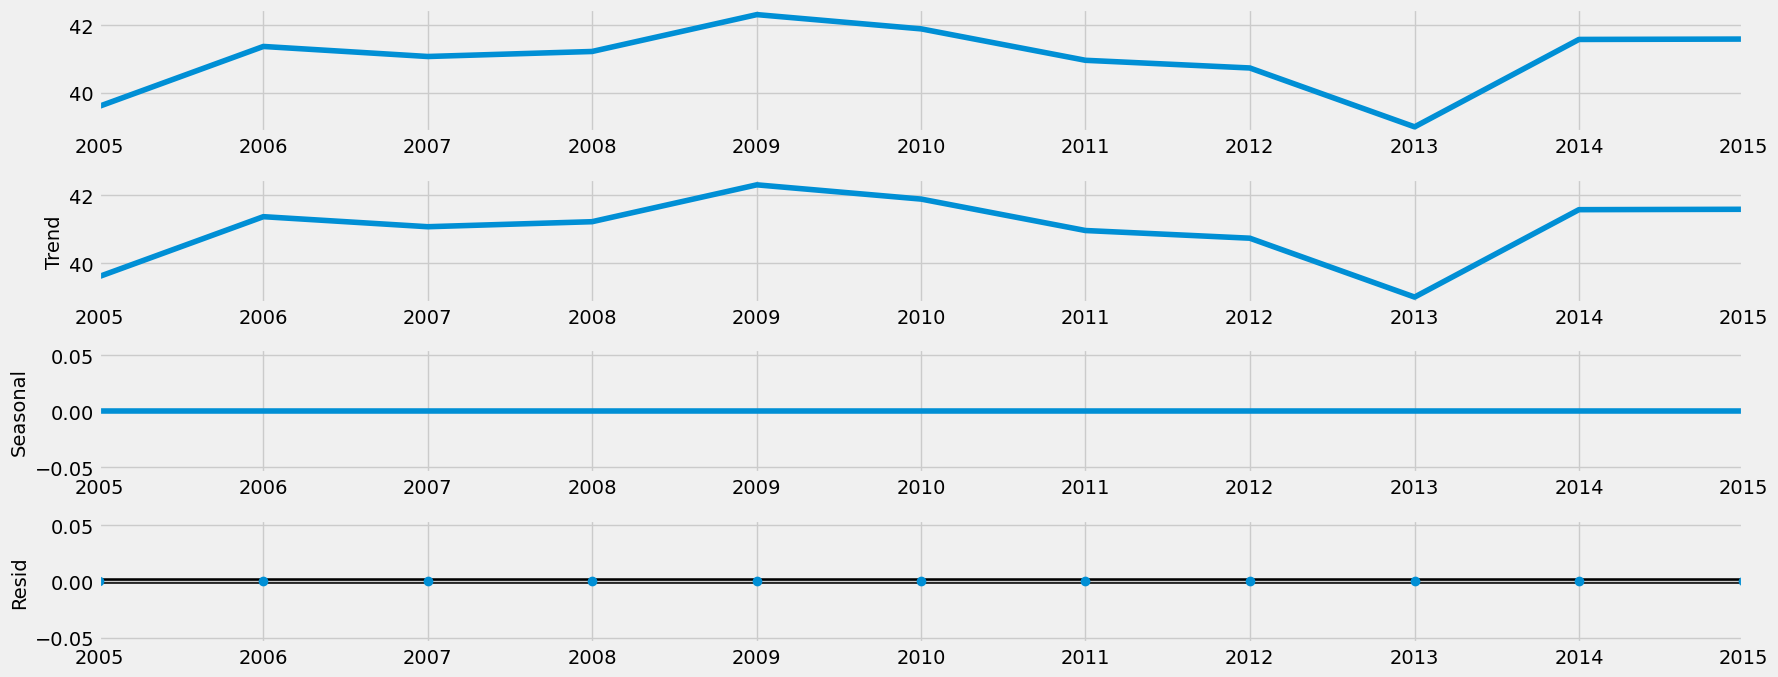

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

There is an overall positive trend even though there is a general decrease from 2009 to 2013. There appears to be no seasonality and no residual noise. The data looks to be non-stationary due to the overall positive trend but still may not be reliable due to the lack of time data points (only 11 points). In addition, while the trend looks significant, the scale of the increase is rather small (the range of the graph is only 3 from 39 to 42. ). 

## 5. Conduct a Dickey-Fuller Test to check for stationarity. Interpret the results and reference your null hypothesis.

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_shanghai_USA['world_rank_Shanghai'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.268637
p-value                        0.016340
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


Test Statistic: -3.269

5% Critical Value: -3.478

Because the Test Statistic is greater than the Critical Value, the null hypothesis cannot be rejected. There is a unit root in the data and the data is non-stationary. 

## 6. Conduct a round of differencing on the data and repeat the check.

In [22]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_shanghai_USA_diff = df_shanghai_USA - df_shanghai_USA.shift(1)

In [23]:
# Remove the missing values in order to run the Dickey-Fuller test. 

df_shanghai_USA_diff.dropna(inplace = True)

In [24]:
df_shanghai_USA_diff.head()

,world_rank_Shanghai
datetime,
2006-01-01,1.766597
2007-01-01,-0.296296
2008-01-01,0.148148
2009-01-01,1.086869
2010-01-01,-0.420202


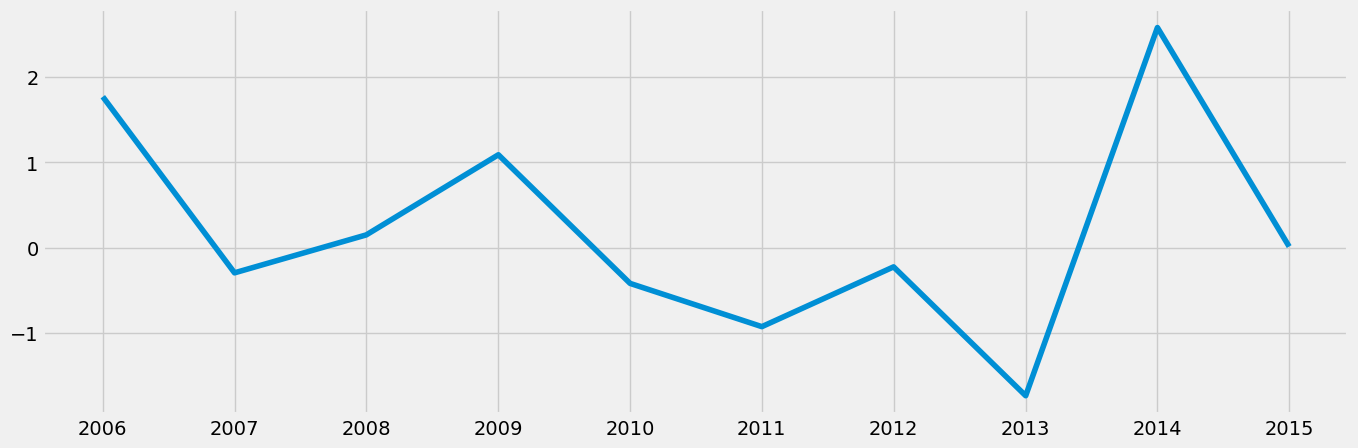

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_shanghai_USA_diff)

In [26]:
dickey_fuller(df_shanghai_USA_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -4.016673
p-value                        0.001326
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


Test Statistic: -4.017

5% Critical Value: -3.290

Because the Test Statistic is greater than the Critical Value, the null hypothesis can be rejected! There is no unit root in the data and the data is now stationary. 

## 7. Check out the data's autocorrelations

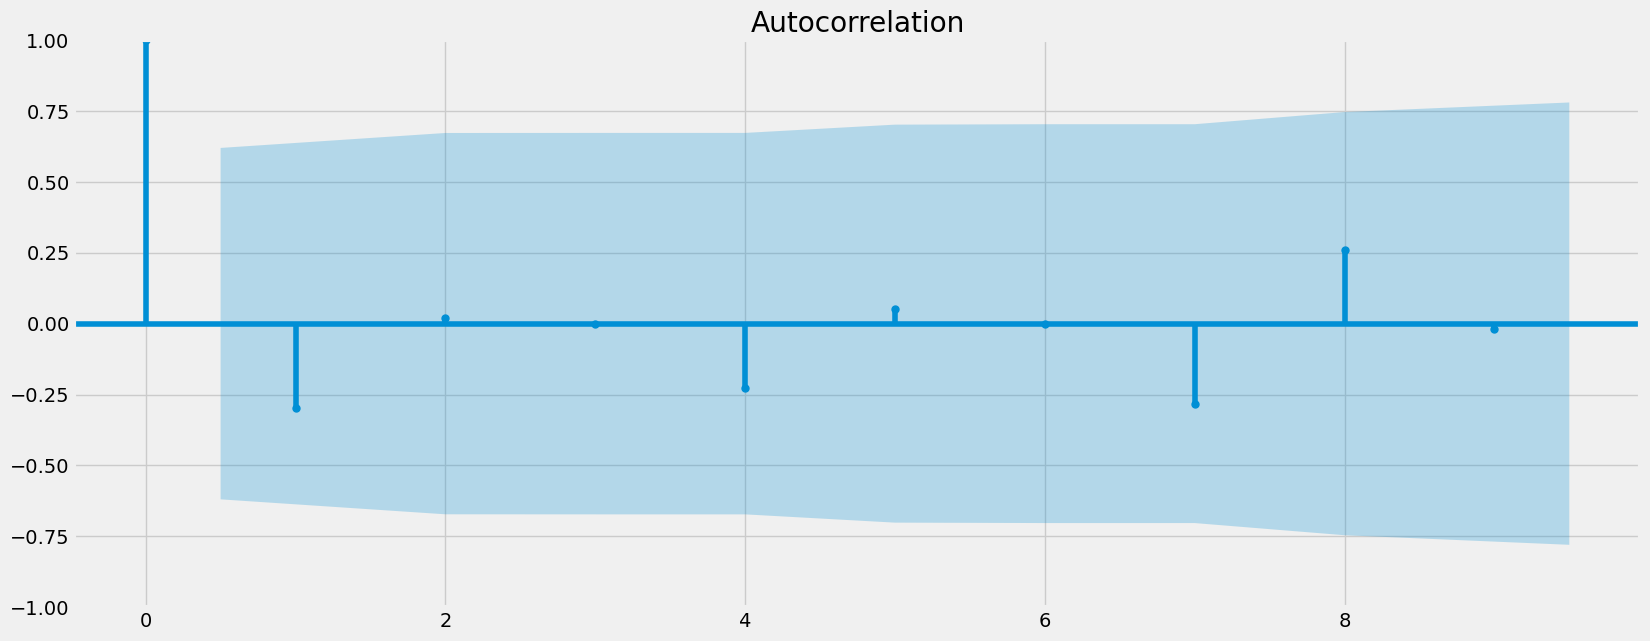

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_shanghai_USA_diff)
plt.show()

There is only one line that it out of bounds of the confidence interval, which indicates that the data is not correlated with each other and is stationary. However, this may due to the fact that there are only 10 datapoints, so this autocorrelation graph may not be accurate. 

## 8. Final steps (saving files)

In [29]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

df_shanghai_timerank.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200_timecountrygrouped.csv'))